<a href="https://colab.research.google.com/github/bharatgirdhar/EVA6_Session7/blob/main/EVA6_Session7_85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U albumentations
import albumentations as A
from albumentations.pytorch import ToTensorV2

     |████████████████████████████████| 102kB 7.3MB/s 
     |████████████████████████████████| 38.2MB 78kB/s 
  Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import sys
sys.path.append('/content/gdrive/My Drive/Colab Notebooks')

In [4]:
import os
os.chdir('/content/gdrive/My Drive/Colab Notebooks')
#os.listdir()
print(os.path.dirname(os.path.realpath('EVA6_Session7_Model_24Channels.ipynb')))
print(os.path.dirname(os.path.realpath('EVA6_Session7.ipynb')))

/content/gdrive/My Drive/Colab Notebooks
/content/gdrive/My Drive/Colab Notebooks


In [5]:
!pip install import_ipynb
import import_ipynb
import EVA6_Session7_Model as NetworkClass

  Created wheel for import-ipynb: filename=import_ipynb-0.1.3-cp37-none-any.whl size=2976 sha256=096b0b01a55f5597d2f138da1fa01966836694b6e67b1f71e0d7c9526c31a55b
  Stored in directory: /root/.cache/pip/wheels/b4/7b/e9/a3a6e496115dffdb4e3085d0ae39ffe8a814eacc44bbf494b5
Successfully built import-ipynb
importing Jupyter notebook from EVA6_Session7_Model.ipynb
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 24, 30, 30]             648
       BatchNorm2d-2           [-1, 24, 30, 30]              48
           Dropout-3           [-1, 24, 30, 30]               0
            Conv2d-4           [-1, 32, 28, 28]           6,912
       BatchNorm2d-5           [-1, 32, 28, 28]              64
           Dropout-6           [-1, 32, 28, 28]               0
            Conv2d-7           [-1, 64, 26, 26]          18,432
       BatchNorm2d-8           [-1, 64, 26, 26]             128


EVA6_Session7_Model.ipynb:226: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


In [6]:
%matplotlib inline

In [7]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
from torch.utils.data import DataLoader, Dataset

In [8]:



transform = A.Compose(
    [A.augmentations.transforms.HorizontalFlip(),
     A.augmentations.geometric.transforms.ShiftScaleRotate(),
     A.augmentations.transforms.CoarseDropout(max_holes=1,max_height=16,max_width=16,min_holes=1, min_height=16, min_width=16,fill_value=0.47, mask_fill_value=None),
     A.Normalize((0.4914, 0.48216, 0.44653), (0.24703, 0.24349, 0.26159)),
     ToTensorV2()
    ])

transform_test = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.4914, 0.48216, 0.44653), (0.24703, 0.24349, 0.26159))])


class Transforms:
    def __init__(self, transforms: A.Compose):
        self.transforms = transforms

    def __call__(self, img, *args, **kwargs):
        return self.transforms(image=np.array(img))

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=Transforms(transform))

#trainset = AlbumentationImageDataset(train_dataset)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64,
                                          shuffle=True, num_workers=2)


#testset = Cifar10SearchDataset()
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform_test)

testloader = torch.utils.data.DataLoader(testset, batch_size=64,
                                        shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 274, 274])
 bird truck  frog horse


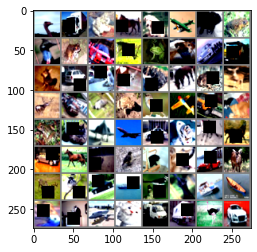

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    print(img.size())
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images['image']))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [10]:
import torch.nn as nn
import torch.nn.functional as F


#class Net(nn.Module):
#    def __init__(self):
#        super(Net, self).__init__()
#        self.pool = nn.MaxPool2d(2, 2)
#        self.conv2 = nn.Conv2d(6, 16, 5)
#        self.fc1 = nn.Linear(16 * 5 * 5, 120)
#        self.fc2 = nn.Linear(120, 84)
#        self.fc3 = nn.Linear(84, 10)

#    def forward(self, x):
#        x = self.pool(F.relu(self.conv1(x)))
#        x = self.pool(F.relu(self.conv2(x)))
#        x = x.view(-1, 16 * 5 * 5)
#        x = F.relu(self.fc1(x))
#        x = F.relu(self.fc2(x))
#        x = self.fc3(x)
#        return x


#net = Net()

In [11]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = NetworkClass.Net(2).to(device)
summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 24, 30, 30]             648
       BatchNorm2d-2           [-1, 24, 30, 30]              48
           Dropout-3           [-1, 24, 30, 30]               0
            Conv2d-4           [-1, 32, 28, 28]           6,912
       BatchNorm2d-5           [-1, 32, 28, 28]              64
           Dropout-6           [-1, 32, 28, 28]               0
            Conv2d-7           [-1, 64, 26, 26]          18,432
       BatchNorm2d-8           [-1, 64, 26, 26]             128
           Dropout-9           [-1, 64, 26, 26]               0
           Conv2d-10          [-1, 128, 24, 24]          73,728
      BatchNorm2d-11          [-1, 128, 24, 24]             256
          Dropout-12          [-1, 128, 24, 24]               0
           Conv2d-13           [-1, 24, 24, 24]           3,072
      BatchNorm2d-14           [-1, 24,

EVA6_Session7_Model.ipynb:226: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


In [14]:
model=torch.load('EVA6_Assignment7_Model.pt')
#model.eval()

In [15]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.005, momentum=0.9)

In [16]:
from tqdm import tqdm
import matplotlib.pyplot as plt
test_losses=[]
train_losses=[]

test_accuracies=[]
train_accuracies=[]

def train(model, device, train_loader, optimizer, epoch, vNormalizationType):
    model.train()
    train_loss=0
    pbar = tqdm(train_loader, leave="false")
    correct=0
    processed=0
    for batch_idx, (data, target) in enumerate(pbar):
        data, target = data['image'].float().to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        #pred = output.argmax(dim=1).float()
        #print(output.requires_grad)
        #pred.requires_grad=True
        #print(pred.size())
        #if vNormalizationType in (0,1):          
        loss = criterion(output, target)
        #else:          
        #  loss = F.l1_loss(pred,target.float())
          #print(pred.size())
          #print('target',target.size())
          #loss.requres_grad= False
          #vL1=0
          #for p in Net.Net(vNormalizationType).parameters():
          #  vL1 += p.abs().sum()
          #loss= loss + vL1Factor*vL1        
        #print('loss',loss)
        pred = output.argmax(dim=1)
        train_loss += loss
        loss.backward()
        optimizer.step()
        
        correct += pred.eq(target.view_as(pred)).sum().item()
        processed += len(data)
        pbar.set_description(desc= f'loss={loss.item()} batch_id={batch_idx} Accuracy={100.*correct/processed:0.2f}')
    
    train_losses.append(train_loss/len(train_loader.dataset))
    train_accuracies.append(100.*correct/processed)
    
    print('\n\nEPOCH : ',epoch)
    print(f"\nTrain Loss{train_loss/len(train_loader.dataset)}")


def test(model, device, test_loader,epoch,vNormalizationType):
    model.eval()
    test_loss = 0
    correct = 0
    missed_pred=[]
    j=0
    with torch.no_grad():
        for batch_idx, (data, target) in enumerate(test_loader):
            data_copy=data
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()
            
    test_loss /= len(test_loader.dataset)
    test_losses.append(test_loss)
    test_accuracies.append(100. * correct / len(test_loader.dataset))
    
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    

In [ ]:
vNormalizationType=0
for epoch in range(1, 25):
      train(model, device, trainloader, optimizer, epoch,vNormalizationType)
      test(model, device, testloader,epoch,vNormalizationType)
  

  0%|          | 0/782 [00:00<?, ?it/s]EVA6_Session7_Model.ipynb:226: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
loss=1.9568129777908325 batch_id=781 Accuracy=26.30: 100%|██████████| 782/782 [00:22<00:00, 35.27it/s]



EPOCH :  1

Train Loss0.030227160081267357



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.7009, Accuracy: 3750/10000 (38%)



loss=1.4582147598266602 batch_id=781 Accuracy=37.87: 100%|██████████| 782/782 [00:22<00:00, 35.26it/s]



EPOCH :  2

Train Loss0.026264995336532593



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.4117, Accuracy: 4868/10000 (49%)



loss=1.5469586849212646 batch_id=781 Accuracy=43.18: 100%|██████████| 782/782 [00:22<00:00, 35.31it/s]




EPOCH :  3

Train Loss0.02431696280837059


  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.4146, Accuracy: 4906/10000 (49%)



loss=1.6886214017868042 batch_id=781 Accuracy=46.47: 100%|██████████| 782/782 [00:22<00:00, 35.13it/s]



EPOCH :  4

Train Loss0.022956879809498787



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.2871, Accuracy: 5197/10000 (52%)



loss=1.3408650159835815 batch_id=781 Accuracy=48.89: 100%|██████████| 782/782 [00:22<00:00, 35.37it/s]



EPOCH :  5

Train Loss0.022134488448500633



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.1721, Accuracy: 5778/10000 (58%)



loss=1.53733229637146 batch_id=781 Accuracy=50.94: 100%|██████████| 782/782 [00:22<00:00, 35.23it/s]



EPOCH :  6

Train Loss0.021224182099103928



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.1516, Accuracy: 5877/10000 (59%)



loss=1.966770887374878 batch_id=781 Accuracy=52.39: 100%|██████████| 782/782 [00:22<00:00, 34.71it/s]




EPOCH :  7

Train Loss0.020623207092285156


  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.1788, Accuracy: 5893/10000 (59%)



loss=1.1278767585754395 batch_id=781 Accuracy=53.65: 100%|██████████| 782/782 [00:22<00:00, 34.64it/s]



EPOCH :  8

Train Loss0.02018309198319912



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.0619, Accuracy: 6238/10000 (62%)



loss=0.9429992437362671 batch_id=781 Accuracy=55.11: 100%|██████████| 782/782 [00:22<00:00, 34.20it/s]



EPOCH :  9

Train Loss0.019564636051654816



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.0254, Accuracy: 6317/10000 (63%)



loss=1.0589510202407837 batch_id=781 Accuracy=56.17: 100%|██████████| 782/782 [00:22<00:00, 34.72it/s]



EPOCH :  10

Train Loss0.01913592778146267



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.0293, Accuracy: 6398/10000 (64%)



loss=1.232919692993164 batch_id=781 Accuracy=57.06: 100%|██████████| 782/782 [00:22<00:00, 35.46it/s]



EPOCH :  11

Train Loss0.018813660368323326



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.9330, Accuracy: 6696/10000 (67%)



loss=1.2848185300827026 batch_id=781 Accuracy=57.99: 100%|██████████| 782/782 [00:22<00:00, 35.17it/s]



EPOCH :  12

Train Loss0.01839645393192768



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.9883, Accuracy: 6581/10000 (66%)



loss=1.0384325981140137 batch_id=781 Accuracy=58.60: 100%|██████████| 782/782 [00:22<00:00, 34.38it/s]




EPOCH :  13

Train Loss0.018189627677202225


  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.9587, Accuracy: 6615/10000 (66%)



loss=1.3833098411560059 batch_id=781 Accuracy=59.13: 100%|██████████| 782/782 [00:22<00:00, 35.16it/s]



EPOCH :  14

Train Loss0.017882613465189934



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.9096, Accuracy: 6832/10000 (68%)



loss=1.3100875616073608 batch_id=781 Accuracy=60.17: 100%|██████████| 782/782 [00:22<00:00, 34.87it/s]



EPOCH :  15

Train Loss0.01754792407155037



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.8536, Accuracy: 6967/10000 (70%)



loss=0.9512039422988892 batch_id=781 Accuracy=60.59: 100%|██████████| 782/782 [00:22<00:00, 34.92it/s]



EPOCH :  16

Train Loss0.017365703359246254



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.8862, Accuracy: 6886/10000 (69%)



loss=1.146869421005249 batch_id=781 Accuracy=61.25: 100%|██████████| 782/782 [00:22<00:00, 35.29it/s]



EPOCH :  17

Train Loss0.017008163034915924



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.8268, Accuracy: 7106/10000 (71%)



loss=1.4919862747192383 batch_id=781 Accuracy=61.86: 100%|██████████| 782/782 [00:22<00:00, 34.90it/s]



EPOCH :  18

Train Loss0.016929863020777702



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.8285, Accuracy: 7066/10000 (71%)



loss=0.8082223534584045 batch_id=781 Accuracy=62.51: 100%|██████████| 782/782 [00:22<00:00, 34.61it/s]



EPOCH :  19

Train Loss0.016544753685593605



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.8108, Accuracy: 7136/10000 (71%)



loss=1.4061633348464966 batch_id=781 Accuracy=62.60: 100%|██████████| 782/782 [00:22<00:00, 34.47it/s]



EPOCH :  20

Train Loss0.016440236940979958



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.8177, Accuracy: 7161/10000 (72%)



loss=0.8303338885307312 batch_id=781 Accuracy=63.22: 100%|██████████| 782/782 [00:22<00:00, 34.25it/s]



EPOCH :  21

Train Loss0.016222678124904633



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.8273, Accuracy: 7138/10000 (71%)



loss=1.0339075326919556 batch_id=781 Accuracy=63.60: 100%|██████████| 782/782 [00:22<00:00, 34.08it/s]



EPOCH :  22

Train Loss0.01616848073899746



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.8494, Accuracy: 7078/10000 (71%)



loss=1.1895877122879028 batch_id=781 Accuracy=63.69: 100%|██████████| 782/782 [00:22<00:00, 34.58it/s]



EPOCH :  23

Train Loss0.015975123271346092



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.8245, Accuracy: 7178/10000 (72%)



loss=0.8037328720092773 batch_id=781 Accuracy=64.31: 100%|██████████| 782/782 [00:22<00:00, 34.55it/s]



EPOCH :  24

Train Loss0.01578141376376152



Test set: Average loss: 0.7428, Accuracy: 7375/10000 (74%)



In [ ]:
vNormalizationType=0
for epoch in range(1, 10):
      train(model, device, trainloader, optimizer, epoch,vNormalizationType)
      test(model, device, testloader,epoch,vNormalizationType)
  

  0%|          | 0/782 [00:00<?, ?it/s]EVA6_Session7_Model.ipynb:226: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
loss=0.6449152231216431 batch_id=781 Accuracy=64.42: 100%|██████████| 782/782 [00:22<00:00, 35.28it/s]



EPOCH :  1

Train Loss0.015658630058169365



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.7363, Accuracy: 7400/10000 (74%)



loss=0.8399494290351868 batch_id=781 Accuracy=64.75: 100%|██████████| 782/782 [00:22<00:00, 35.17it/s]




EPOCH :  2

Train Loss0.01546943187713623


  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.7569, Accuracy: 7407/10000 (74%)



loss=1.711318850517273 batch_id=781 Accuracy=65.02: 100%|██████████| 782/782 [00:22<00:00, 35.35it/s]



EPOCH :  3

Train Loss0.015421990305185318



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.7571, Accuracy: 7410/10000 (74%)



loss=1.2312301397323608 batch_id=781 Accuracy=65.41: 100%|██████████| 782/782 [00:22<00:00, 34.66it/s]



EPOCH :  4

Train Loss0.015236785635352135



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.7424, Accuracy: 7444/10000 (74%)



loss=1.2229092121124268 batch_id=781 Accuracy=65.95: 100%|██████████| 782/782 [00:22<00:00, 34.48it/s]



EPOCH :  5

Train Loss0.015066562220454216



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.7163, Accuracy: 7522/10000 (75%)



loss=0.9748338460922241 batch_id=781 Accuracy=65.91: 100%|██████████| 782/782 [00:22<00:00, 34.55it/s]



EPOCH :  6

Train Loss0.015018339268863201



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.7418, Accuracy: 7435/10000 (74%)



loss=1.3466300964355469 batch_id=781 Accuracy=65.81: 100%|██████████| 782/782 [00:22<00:00, 34.96it/s]



EPOCH :  7

Train Loss0.015001735650002956



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6998, Accuracy: 7589/10000 (76%)



loss=1.154579520225525 batch_id=781 Accuracy=66.51: 100%|██████████| 782/782 [00:22<00:00, 34.76it/s]




EPOCH :  8

Train Loss0.014828946441411972


  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.7168, Accuracy: 7553/10000 (76%)



loss=0.9889768958091736 batch_id=781 Accuracy=66.91: 100%|██████████| 782/782 [00:22<00:00, 34.61it/s]



EPOCH :  9

Train Loss0.014720498584210873



Test set: Average loss: 0.7286, Accuracy: 7523/10000 (75%)



In [ ]:
vNormalizationType=0
for epoch in range(1, 10):
      train(model, device, trainloader, optimizer, epoch,vNormalizationType)
      test(model, device, testloader,epoch,vNormalizationType)

  0%|          | 0/782 [00:00<?, ?it/s]EVA6_Session7_Model.ipynb:226: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
loss=1.9530177116394043 batch_id=781 Accuracy=66.90: 100%|██████████| 782/782 [00:22<00:00, 35.11it/s]




EPOCH :  1

Train Loss0.014638102613389492


  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.7467, Accuracy: 7478/10000 (75%)



loss=1.248509407043457 batch_id=781 Accuracy=67.07: 100%|██████████| 782/782 [00:22<00:00, 34.13it/s]



EPOCH :  2

Train Loss0.014523595571517944



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.7111, Accuracy: 7545/10000 (75%)



loss=1.7338368892669678 batch_id=781 Accuracy=67.40: 100%|██████████| 782/782 [00:22<00:00, 34.76it/s]



EPOCH :  3

Train Loss0.014419813640415668



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6939, Accuracy: 7599/10000 (76%)



loss=1.2450441122055054 batch_id=781 Accuracy=67.76: 100%|██████████| 782/782 [00:22<00:00, 34.74it/s]



EPOCH :  4

Train Loss0.014287217520177364



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6880, Accuracy: 7673/10000 (77%)



loss=0.8093847632408142 batch_id=781 Accuracy=67.61: 100%|██████████| 782/782 [00:22<00:00, 35.08it/s]



EPOCH :  5

Train Loss0.014343886636197567



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6976, Accuracy: 7569/10000 (76%)



loss=0.8872002959251404 batch_id=781 Accuracy=67.96: 100%|██████████| 782/782 [00:22<00:00, 34.98it/s]



EPOCH :  6

Train Loss0.014177795499563217



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6817, Accuracy: 7626/10000 (76%)



loss=1.399397611618042 batch_id=781 Accuracy=68.18: 100%|██████████| 782/782 [00:22<00:00, 35.09it/s]



EPOCH :  7

Train Loss0.014141746796667576



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6900, Accuracy: 7563/10000 (76%)



loss=0.8431627750396729 batch_id=781 Accuracy=68.51: 100%|██████████| 782/782 [00:22<00:00, 35.16it/s]



EPOCH :  8

Train Loss0.014051995240151882



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6583, Accuracy: 7675/10000 (77%)



loss=1.412846326828003 batch_id=781 Accuracy=68.86: 100%|██████████| 782/782 [00:22<00:00, 34.67it/s]



EPOCH :  9

Train Loss0.013853157870471478



Test set: Average loss: 0.6545, Accuracy: 7753/10000 (78%)



In [ ]:
vNormalizationType=0
for epoch in range(1, 10):
      train(model, device, trainloader, optimizer, epoch,vNormalizationType)
      test(model, device, testloader,epoch,vNormalizationType)

  0%|          | 0/782 [00:00<?, ?it/s]EVA6_Session7_Model.ipynb:226: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
loss=0.9544662237167358 batch_id=781 Accuracy=68.70: 100%|██████████| 782/782 [00:22<00:00, 34.58it/s]



EPOCH :  1

Train Loss0.013941760174930096



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6781, Accuracy: 7700/10000 (77%)



loss=1.5161480903625488 batch_id=781 Accuracy=69.11: 100%|██████████| 782/782 [00:22<00:00, 35.25it/s]



EPOCH :  2

Train Loss0.01369794923812151



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6638, Accuracy: 7779/10000 (78%)



loss=0.7507659196853638 batch_id=781 Accuracy=69.40: 100%|██████████| 782/782 [00:22<00:00, 35.52it/s]



EPOCH :  3

Train Loss0.013625169172883034



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6468, Accuracy: 7754/10000 (78%)



loss=0.8507375717163086 batch_id=781 Accuracy=68.94: 100%|██████████| 782/782 [00:22<00:00, 35.00it/s]



EPOCH :  4

Train Loss0.013684619218111038



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6639, Accuracy: 7721/10000 (77%)



loss=1.4243040084838867 batch_id=781 Accuracy=69.19: 100%|██████████| 782/782 [00:22<00:00, 35.22it/s]



EPOCH :  5

Train Loss0.013650977052748203



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6720, Accuracy: 7711/10000 (77%)



loss=1.2199687957763672 batch_id=781 Accuracy=69.47: 100%|██████████| 782/782 [00:22<00:00, 35.42it/s]



EPOCH :  6

Train Loss0.013506069779396057



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6389, Accuracy: 7816/10000 (78%)



loss=0.8986830115318298 batch_id=781 Accuracy=69.85: 100%|██████████| 782/782 [00:22<00:00, 35.04it/s]



EPOCH :  7

Train Loss0.013431263156235218



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6633, Accuracy: 7764/10000 (78%)



loss=1.0323528051376343 batch_id=781 Accuracy=70.05: 100%|██████████| 782/782 [00:22<00:00, 35.32it/s]



EPOCH :  8

Train Loss0.013347822241485119



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6330, Accuracy: 7789/10000 (78%)



loss=0.9765236973762512 batch_id=781 Accuracy=69.97: 100%|██████████| 782/782 [00:22<00:00, 34.48it/s]



EPOCH :  9

Train Loss0.013337754644453526



Test set: Average loss: 0.6465, Accuracy: 7778/10000 (78%)



In [ ]:
vNormalizationType=0
for epoch in range(1, 10):
      train(model, device, trainloader, optimizer, epoch,vNormalizationType)
      test(model, device, testloader,epoch,vNormalizationType)

  0%|          | 0/782 [00:00<?, ?it/s]EVA6_Session7_Model.ipynb:226: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
loss=0.4139750897884369 batch_id=781 Accuracy=70.33: 100%|██████████| 782/782 [00:22<00:00, 35.11it/s]



EPOCH :  1

Train Loss0.013298326171934605



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6607, Accuracy: 7749/10000 (77%)



loss=1.873671293258667 batch_id=781 Accuracy=70.34: 100%|██████████| 782/782 [00:22<00:00, 35.24it/s]



EPOCH :  2

Train Loss0.013249407522380352



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6133, Accuracy: 7877/10000 (79%)



loss=0.7168667912483215 batch_id=781 Accuracy=70.52: 100%|██████████| 782/782 [00:22<00:00, 35.30it/s]



EPOCH :  3

Train Loss0.01316613145172596



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6146, Accuracy: 7905/10000 (79%)



loss=1.0172187089920044 batch_id=781 Accuracy=70.20: 100%|██████████| 782/782 [00:22<00:00, 35.25it/s]



EPOCH :  4

Train Loss0.013165337033569813



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6253, Accuracy: 7849/10000 (78%)



loss=0.699046790599823 batch_id=781 Accuracy=70.55: 100%|██████████| 782/782 [00:22<00:00, 35.38it/s]




EPOCH :  5

Train Loss0.01310255378484726


  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6267, Accuracy: 7870/10000 (79%)



loss=1.1909223794937134 batch_id=781 Accuracy=70.86: 100%|██████████| 782/782 [00:22<00:00, 34.93it/s]



EPOCH :  6

Train Loss0.013010471127927303



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6211, Accuracy: 7895/10000 (79%)



loss=1.625532865524292 batch_id=781 Accuracy=71.10: 100%|██████████| 782/782 [00:22<00:00, 35.28it/s]




EPOCH :  7

Train Loss0.012925905175507069


  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6229, Accuracy: 7861/10000 (79%)



loss=1.3087351322174072 batch_id=781 Accuracy=70.69: 100%|██████████| 782/782 [00:22<00:00, 35.14it/s]



EPOCH :  8

Train Loss0.012901711277663708



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6359, Accuracy: 7867/10000 (79%)



loss=1.1783013343811035 batch_id=781 Accuracy=70.91: 100%|██████████| 782/782 [00:22<00:00, 35.21it/s]



EPOCH :  9

Train Loss0.012914827093482018



Test set: Average loss: 0.6128, Accuracy: 7915/10000 (79%)



In [ ]:
vNormalizationType=0
for epoch in range(1, 15):
      train(model, device, trainloader, optimizer, epoch,vNormalizationType)
      test(model, device, testloader,epoch,vNormalizationType)

  0%|          | 0/782 [00:00<?, ?it/s]EVA6_Session7_Model.ipynb:226: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
loss=0.8749905824661255 batch_id=781 Accuracy=70.97: 100%|██████████| 782/782 [00:22<00:00, 35.38it/s]



EPOCH :  1

Train Loss0.012893197126686573



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6064, Accuracy: 7929/10000 (79%)



loss=0.8184225559234619 batch_id=781 Accuracy=71.30: 100%|██████████| 782/782 [00:22<00:00, 35.22it/s]



EPOCH :  2

Train Loss0.012778920121490955



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6046, Accuracy: 7943/10000 (79%)



loss=0.6437528133392334 batch_id=781 Accuracy=71.27: 100%|██████████| 782/782 [00:21<00:00, 35.58it/s]




EPOCH :  3

Train Loss0.012775778770446777


  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6062, Accuracy: 7930/10000 (79%)



loss=0.6619424819946289 batch_id=781 Accuracy=71.48: 100%|██████████| 782/782 [00:22<00:00, 35.34it/s]



EPOCH :  4

Train Loss0.012700188905000687



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6453, Accuracy: 7763/10000 (78%)



loss=1.0971145629882812 batch_id=781 Accuracy=71.53: 100%|██████████| 782/782 [00:22<00:00, 35.37it/s]



EPOCH :  5

Train Loss0.012645235285162926



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5749, Accuracy: 8009/10000 (80%)



loss=0.6443541049957275 batch_id=781 Accuracy=71.82: 100%|██████████| 782/782 [00:22<00:00, 35.47it/s]



EPOCH :  6

Train Loss0.012504488229751587



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5872, Accuracy: 7974/10000 (80%)



loss=1.444745659828186 batch_id=781 Accuracy=72.02: 100%|██████████| 782/782 [00:22<00:00, 35.53it/s]



EPOCH :  7

Train Loss0.012566442601382732



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5817, Accuracy: 7992/10000 (80%)



loss=1.2063921689987183 batch_id=781 Accuracy=71.81: 100%|██████████| 782/782 [00:22<00:00, 35.16it/s]



EPOCH :  8

Train Loss0.01250429917126894



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5720, Accuracy: 8026/10000 (80%)



loss=1.2254524230957031 batch_id=781 Accuracy=72.14: 100%|██████████| 782/782 [00:22<00:00, 35.19it/s]



EPOCH :  9

Train Loss0.01243671029806137



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5787, Accuracy: 8046/10000 (80%)



loss=0.5730130672454834 batch_id=781 Accuracy=72.14: 100%|██████████| 782/782 [00:22<00:00, 34.68it/s]



EPOCH :  10

Train Loss0.012388466857373714



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5896, Accuracy: 7965/10000 (80%)



loss=1.1047286987304688 batch_id=781 Accuracy=72.24: 100%|██████████| 782/782 [00:22<00:00, 34.24it/s]



EPOCH :  11

Train Loss0.012317641638219357



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5822, Accuracy: 8003/10000 (80%)



loss=1.1846892833709717 batch_id=781 Accuracy=72.47: 100%|██████████| 782/782 [00:22<00:00, 34.47it/s]



EPOCH :  12

Train Loss0.012281086295843124



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5817, Accuracy: 8017/10000 (80%)



loss=0.676464319229126 batch_id=781 Accuracy=72.29: 100%|██████████| 782/782 [00:22<00:00, 35.02it/s]



EPOCH :  13

Train Loss0.012322778813540936



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5749, Accuracy: 8001/10000 (80%)



loss=0.6969378590583801 batch_id=781 Accuracy=72.57: 100%|██████████| 782/782 [00:22<00:00, 34.96it/s]



EPOCH :  14

Train Loss0.012204661965370178



Test set: Average loss: 0.5721, Accuracy: 8050/10000 (80%)



In [ ]:
vNormalizationType=0
for epoch in range(1, 15):
      train(model, device, trainloader, optimizer, epoch,vNormalizationType)
      test(model, device, testloader,epoch,vNormalizationType)

  0%|          | 0/782 [00:00<?, ?it/s]EVA6_Session7_Model.ipynb:226: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
loss=0.9263454675674438 batch_id=781 Accuracy=72.43: 100%|██████████| 782/782 [00:22<00:00, 35.36it/s]



EPOCH :  1

Train Loss0.012208295986056328



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5626, Accuracy: 8139/10000 (81%)



loss=1.361093282699585 batch_id=781 Accuracy=72.68: 100%|██████████| 782/782 [00:22<00:00, 35.17it/s]



EPOCH :  2

Train Loss0.012229315005242825



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5686, Accuracy: 8091/10000 (81%)



loss=0.6231134533882141 batch_id=781 Accuracy=72.82: 100%|██████████| 782/782 [00:22<00:00, 35.50it/s]



EPOCH :  3

Train Loss0.012162181548774242



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5489, Accuracy: 8149/10000 (81%)



loss=1.046541452407837 batch_id=781 Accuracy=73.14: 100%|██████████| 782/782 [00:22<00:00, 34.99it/s]




EPOCH :  4

Train Loss0.01204096619039774


  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5672, Accuracy: 8098/10000 (81%)



loss=1.1616854667663574 batch_id=781 Accuracy=72.81: 100%|██████████| 782/782 [00:22<00:00, 34.37it/s]



EPOCH :  5

Train Loss0.012100768275558949



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5666, Accuracy: 8059/10000 (81%)



loss=0.7295176982879639 batch_id=781 Accuracy=73.15: 100%|██████████| 782/782 [00:22<00:00, 35.20it/s]



EPOCH :  6

Train Loss0.012007081881165504



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5713, Accuracy: 8049/10000 (80%)



loss=0.5448417067527771 batch_id=781 Accuracy=73.03: 100%|██████████| 782/782 [00:22<00:00, 34.90it/s]




EPOCH :  7

Train Loss0.01195718813687563


  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5729, Accuracy: 8010/10000 (80%)



loss=0.6574609279632568 batch_id=781 Accuracy=73.11: 100%|██████████| 782/782 [00:22<00:00, 35.01it/s]



EPOCH :  8

Train Loss0.012021580711007118



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5493, Accuracy: 8119/10000 (81%)



loss=1.2876112461090088 batch_id=781 Accuracy=73.11: 100%|██████████| 782/782 [00:22<00:00, 35.24it/s]



EPOCH :  9

Train Loss0.011958257295191288



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5646, Accuracy: 8096/10000 (81%)



loss=1.0277791023254395 batch_id=781 Accuracy=73.43: 100%|██████████| 782/782 [00:22<00:00, 35.24it/s]



EPOCH :  10

Train Loss0.011815807782113552



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5540, Accuracy: 8147/10000 (81%)



loss=0.46813488006591797 batch_id=781 Accuracy=73.11: 100%|██████████| 782/782 [00:22<00:00, 35.20it/s]



EPOCH :  11

Train Loss0.011957630515098572



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5645, Accuracy: 8115/10000 (81%)



loss=0.6980348229408264 batch_id=781 Accuracy=73.52: 100%|██████████| 782/782 [00:22<00:00, 35.14it/s]



EPOCH :  12

Train Loss0.011821763589978218



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5507, Accuracy: 8175/10000 (82%)



loss=1.2676900625228882 batch_id=781 Accuracy=73.31: 100%|██████████| 782/782 [00:22<00:00, 35.18it/s]



EPOCH :  13

Train Loss0.011865539476275444



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5692, Accuracy: 8086/10000 (81%)



loss=0.7517128586769104 batch_id=781 Accuracy=73.55: 100%|██████████| 782/782 [00:22<00:00, 35.39it/s]



EPOCH :  14

Train Loss0.011795524507761002



Test set: Average loss: 0.5599, Accuracy: 8124/10000 (81%)



In [ ]:
vNormalizationType=0
for epoch in range(1, 15):
      train(model, device, trainloader, optimizer, epoch,vNormalizationType)
      test(model, device, testloader,epoch,vNormalizationType)

  0%|          | 0/782 [00:00<?, ?it/s]EVA6_Session7_Model.ipynb:226: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
loss=0.48899656534194946 batch_id=781 Accuracy=73.33: 100%|██████████| 782/782 [00:22<00:00, 35.15it/s]



EPOCH :  1

Train Loss0.011888722889125347



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5393, Accuracy: 8175/10000 (82%)



loss=0.6687628030776978 batch_id=781 Accuracy=73.60: 100%|██████████| 782/782 [00:22<00:00, 35.16it/s]



EPOCH :  2

Train Loss0.011753221042454243



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5334, Accuracy: 8198/10000 (82%)



loss=1.2186620235443115 batch_id=781 Accuracy=73.52: 100%|██████████| 782/782 [00:22<00:00, 35.36it/s]



EPOCH :  3

Train Loss0.011807463131844997



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5316, Accuracy: 8198/10000 (82%)



loss=0.7185202240943909 batch_id=781 Accuracy=73.87: 100%|██████████| 782/782 [00:22<00:00, 35.26it/s]



EPOCH :  4

Train Loss0.011679604649543762



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5529, Accuracy: 8158/10000 (82%)



loss=1.622862696647644 batch_id=781 Accuracy=74.01: 100%|██████████| 782/782 [00:22<00:00, 35.41it/s]



EPOCH :  5

Train Loss0.011559747159481049



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5198, Accuracy: 8211/10000 (82%)



loss=0.9487915635108948 batch_id=781 Accuracy=74.14: 100%|██████████| 782/782 [00:22<00:00, 35.48it/s]



EPOCH :  6

Train Loss0.011568491347134113



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5649, Accuracy: 8099/10000 (81%)



loss=1.2896915674209595 batch_id=781 Accuracy=74.01: 100%|██████████| 782/782 [00:22<00:00, 35.24it/s]



EPOCH :  7

Train Loss0.01157436240464449



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5373, Accuracy: 8210/10000 (82%)



loss=0.7835575938224792 batch_id=781 Accuracy=74.12: 100%|██████████| 782/782 [00:22<00:00, 34.91it/s]




EPOCH :  8

Train Loss0.011529405601322651


  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5369, Accuracy: 8220/10000 (82%)



loss=0.5909671187400818 batch_id=781 Accuracy=73.99: 100%|██████████| 782/782 [00:22<00:00, 34.22it/s]



EPOCH :  9

Train Loss0.01159828994423151



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5445, Accuracy: 8159/10000 (82%)



loss=0.9249904155731201 batch_id=781 Accuracy=74.23: 100%|██████████| 782/782 [00:22<00:00, 34.42it/s]



EPOCH :  10

Train Loss0.01153908297419548



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5373, Accuracy: 8169/10000 (82%)



loss=0.9445971250534058 batch_id=781 Accuracy=74.00: 100%|██████████| 782/782 [00:22<00:00, 34.38it/s]




EPOCH :  11

Train Loss0.011596400290727615


  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5186, Accuracy: 8222/10000 (82%)



loss=1.0437211990356445 batch_id=781 Accuracy=74.65: 100%|██████████| 782/782 [00:22<00:00, 34.49it/s]



EPOCH :  12

Train Loss0.011463495902717113



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5168, Accuracy: 8238/10000 (82%)



loss=0.3857543170452118 batch_id=781 Accuracy=74.49: 100%|██████████| 782/782 [00:22<00:00, 34.38it/s]



EPOCH :  13

Train Loss0.011541228741407394



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5343, Accuracy: 8193/10000 (82%)



loss=0.9491515755653381 batch_id=781 Accuracy=74.61: 100%|██████████| 782/782 [00:22<00:00, 34.67it/s]



EPOCH :  14

Train Loss0.01140105165541172



Test set: Average loss: 0.5177, Accuracy: 8259/10000 (83%)



In [ ]:
vNormalizationType=0
for epoch in range(1, 15):
      train(model, device, trainloader, optimizer, epoch,vNormalizationType)
      test(model, device, testloader,epoch,vNormalizationType)

  0%|          | 0/782 [00:00<?, ?it/s]EVA6_Session7_Model.ipynb:226: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
loss=0.23463453352451324 batch_id=781 Accuracy=72.50: 100%|██████████| 782/782 [00:22<00:00, 34.49it/s]



EPOCH :  1

Train Loss0.012445911765098572



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5461, Accuracy: 8172/10000 (82%)



loss=1.6023353338241577 batch_id=781 Accuracy=74.40: 100%|██████████| 782/782 [00:22<00:00, 34.51it/s]



EPOCH :  2

Train Loss0.011587806977331638



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5169, Accuracy: 8268/10000 (83%)



loss=0.8060224652290344 batch_id=781 Accuracy=74.94: 100%|██████████| 782/782 [00:22<00:00, 34.72it/s]



EPOCH :  3

Train Loss0.011185625568032265



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5366, Accuracy: 8200/10000 (82%)



loss=0.804060161113739 batch_id=781 Accuracy=74.92: 100%|██████████| 782/782 [00:22<00:00, 34.61it/s]



EPOCH :  4

Train Loss0.011258617043495178



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5329, Accuracy: 8221/10000 (82%)



loss=0.9048333764076233 batch_id=781 Accuracy=75.30: 100%|██████████| 782/782 [00:22<00:00, 34.76it/s]



EPOCH :  5

Train Loss0.011085696518421173



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5145, Accuracy: 8276/10000 (83%)



loss=1.1502333879470825 batch_id=781 Accuracy=75.36: 100%|██████████| 782/782 [00:22<00:00, 34.66it/s]



EPOCH :  6

Train Loss0.011028106324374676



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5058, Accuracy: 8312/10000 (83%)



loss=0.9548405408859253 batch_id=781 Accuracy=75.82: 100%|██████████| 782/782 [00:22<00:00, 34.57it/s]




EPOCH :  7

Train Loss0.010934116318821907


  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5044, Accuracy: 8319/10000 (83%)



loss=0.46014195680618286 batch_id=781 Accuracy=75.64: 100%|██████████| 782/782 [00:22<00:00, 34.69it/s]




EPOCH :  8

Train Loss0.01092646736651659


  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5293, Accuracy: 8269/10000 (83%)



loss=0.5835012793540955 batch_id=781 Accuracy=75.92: 100%|██████████| 782/782 [00:22<00:00, 34.54it/s]



EPOCH :  9

Train Loss0.010870627127587795



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5100, Accuracy: 8309/10000 (83%)



loss=0.7196645140647888 batch_id=781 Accuracy=75.81: 100%|██████████| 782/782 [00:22<00:00, 34.45it/s]



EPOCH :  10

Train Loss0.010874741710722446



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5025, Accuracy: 8320/10000 (83%)



loss=0.6581433415412903 batch_id=781 Accuracy=75.77: 100%|██████████| 782/782 [00:22<00:00, 34.49it/s]



EPOCH :  11

Train Loss0.010883637703955173



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4965, Accuracy: 8367/10000 (84%)



loss=0.8623426556587219 batch_id=781 Accuracy=76.18: 100%|██████████| 782/782 [00:22<00:00, 34.47it/s]



EPOCH :  12

Train Loss0.010796388611197472



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5028, Accuracy: 8318/10000 (83%)



loss=1.287911295890808 batch_id=781 Accuracy=75.91: 100%|██████████| 782/782 [00:22<00:00, 34.49it/s]



EPOCH :  13

Train Loss0.010781246237456799



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5149, Accuracy: 8242/10000 (82%)



loss=0.7917109727859497 batch_id=781 Accuracy=76.19: 100%|██████████| 782/782 [00:22<00:00, 34.61it/s]



EPOCH :  14

Train Loss0.010697904974222183



Test set: Average loss: 0.5055, Accuracy: 8340/10000 (83%)



In [ ]:
vNormalizationType=0
for epoch in range(1, 15):
      train(model, device, trainloader, optimizer, epoch,vNormalizationType)
      test(model, device, testloader,epoch,vNormalizationType)

  0%|          | 0/782 [00:00<?, ?it/s]EVA6_Session7_Model.ipynb:226: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
loss=0.6693652868270874 batch_id=781 Accuracy=72.91: 100%|██████████| 782/782 [00:22<00:00, 34.58it/s]



EPOCH :  1

Train Loss0.012156922370195389



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5190, Accuracy: 8274/10000 (83%)



loss=1.0478111505508423 batch_id=781 Accuracy=75.05: 100%|██████████| 782/782 [00:22<00:00, 34.51it/s]



EPOCH :  2

Train Loss0.011214657686650753



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5099, Accuracy: 8295/10000 (83%)



loss=0.49254459142684937 batch_id=781 Accuracy=75.30: 100%|██████████| 782/782 [00:22<00:00, 34.63it/s]



EPOCH :  3

Train Loss0.011060316115617752



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5144, Accuracy: 8305/10000 (83%)



loss=1.654940128326416 batch_id=781 Accuracy=75.76: 100%|██████████| 782/782 [00:22<00:00, 34.60it/s]



EPOCH :  4

Train Loss0.010901945643126965



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5213, Accuracy: 8278/10000 (83%)



loss=0.5658267140388489 batch_id=781 Accuracy=76.11: 100%|██████████| 782/782 [00:22<00:00, 34.81it/s]



EPOCH :  5

Train Loss0.010754409246146679



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5226, Accuracy: 8284/10000 (83%)



loss=0.28168734908103943 batch_id=781 Accuracy=75.95: 100%|██████████| 782/782 [00:22<00:00, 34.66it/s]



EPOCH :  6

Train Loss0.01079872902482748



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5005, Accuracy: 8310/10000 (83%)



loss=0.5693663358688354 batch_id=781 Accuracy=76.48: 100%|██████████| 782/782 [00:22<00:00, 34.74it/s]



EPOCH :  7

Train Loss0.010612178593873978



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4922, Accuracy: 8356/10000 (84%)



loss=0.9680985808372498 batch_id=781 Accuracy=76.74: 100%|██████████| 782/782 [00:22<00:00, 34.02it/s]



EPOCH :  8

Train Loss0.010552579537034035



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5045, Accuracy: 8324/10000 (83%)



loss=1.1188311576843262 batch_id=781 Accuracy=76.42: 100%|██████████| 782/782 [00:23<00:00, 33.82it/s]



EPOCH :  9

Train Loss0.010546784847974777



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4957, Accuracy: 8359/10000 (84%)



loss=0.7801318168640137 batch_id=781 Accuracy=76.69: 100%|██████████| 782/782 [00:23<00:00, 33.94it/s]



EPOCH :  10

Train Loss0.010587617754936218



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5304, Accuracy: 8281/10000 (83%)



loss=0.6611316204071045 batch_id=781 Accuracy=76.69: 100%|██████████| 782/782 [00:22<00:00, 34.37it/s]



EPOCH :  11

Train Loss0.010509938932955265



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4988, Accuracy: 8320/10000 (83%)



loss=0.5998710989952087 batch_id=781 Accuracy=76.53: 100%|██████████| 782/782 [00:22<00:00, 34.29it/s]



EPOCH :  12

Train Loss0.010477275587618351



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5199, Accuracy: 8290/10000 (83%)



loss=0.9369716644287109 batch_id=781 Accuracy=76.59: 100%|██████████| 782/782 [00:22<00:00, 34.28it/s]



EPOCH :  13

Train Loss0.010446428321301937



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5048, Accuracy: 8342/10000 (83%)



loss=0.7265325784683228 batch_id=781 Accuracy=76.76: 100%|██████████| 782/782 [00:22<00:00, 34.15it/s]



EPOCH :  14

Train Loss0.010362992994487286



Test set: Average loss: 0.4990, Accuracy: 8382/10000 (84%)



In [ ]:
vNormalizationType=0
for epoch in range(1, 15):
      train(model, device, trainloader, optimizer, epoch,vNormalizationType)
      test(model, device, testloader,epoch,vNormalizationType)

  0%|          | 0/782 [00:00<?, ?it/s]EVA6_Session7_Model.ipynb:226: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
loss=0.7031692266464233 batch_id=781 Accuracy=74.41: 100%|██████████| 782/782 [00:22<00:00, 34.75it/s]



EPOCH :  1

Train Loss0.011580443009734154



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5173, Accuracy: 8285/10000 (83%)



loss=0.5736824870109558 batch_id=781 Accuracy=75.98: 100%|██████████| 782/782 [00:22<00:00, 34.64it/s]



EPOCH :  2

Train Loss0.010853096842765808



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5195, Accuracy: 8235/10000 (82%)



loss=1.4309324026107788 batch_id=781 Accuracy=76.24: 100%|██████████| 782/782 [00:22<00:00, 34.64it/s]



EPOCH :  3

Train Loss0.010702851228415966



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5093, Accuracy: 8322/10000 (83%)



loss=1.096526861190796 batch_id=781 Accuracy=76.31: 100%|██████████| 782/782 [00:22<00:00, 34.88it/s]



EPOCH :  4

Train Loss0.010601633228361607



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4972, Accuracy: 8389/10000 (84%)



loss=0.7639728784561157 batch_id=781 Accuracy=76.34: 100%|██████████| 782/782 [00:22<00:00, 34.59it/s]



EPOCH :  5

Train Loss0.010533739812672138



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4980, Accuracy: 8354/10000 (84%)



loss=1.039717197418213 batch_id=781 Accuracy=77.05: 100%|██████████| 782/782 [00:22<00:00, 34.43it/s]



EPOCH :  6

Train Loss0.01045705284923315



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4915, Accuracy: 8337/10000 (83%)



loss=0.2949952781200409 batch_id=781 Accuracy=76.70: 100%|██████████| 782/782 [00:22<00:00, 34.78it/s]



EPOCH :  7

Train Loss0.010480553843080997



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4954, Accuracy: 8353/10000 (84%)



loss=0.3912990987300873 batch_id=781 Accuracy=76.66: 100%|██████████| 782/782 [00:23<00:00, 33.78it/s]



EPOCH :  8

Train Loss0.010442513041198254



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4889, Accuracy: 8371/10000 (84%)



loss=0.8873724341392517 batch_id=781 Accuracy=76.87: 100%|██████████| 782/782 [00:23<00:00, 33.80it/s]



EPOCH :  9

Train Loss0.010304920375347137



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4787, Accuracy: 8413/10000 (84%)



loss=0.6550809741020203 batch_id=781 Accuracy=77.33: 100%|██████████| 782/782 [00:22<00:00, 34.03it/s]



EPOCH :  10

Train Loss0.010274697095155716



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4858, Accuracy: 8373/10000 (84%)



loss=1.4167797565460205 batch_id=781 Accuracy=77.19: 100%|██████████| 782/782 [00:23<00:00, 33.98it/s]



EPOCH :  11

Train Loss0.010303301736712456



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4837, Accuracy: 8378/10000 (84%)



loss=0.7233567833900452 batch_id=781 Accuracy=77.28: 100%|██████████| 782/782 [00:22<00:00, 34.04it/s]



EPOCH :  12

Train Loss0.010262178257107735



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4797, Accuracy: 8396/10000 (84%)



loss=0.603298544883728 batch_id=781 Accuracy=77.00: 100%|██████████| 782/782 [00:22<00:00, 34.21it/s]



EPOCH :  13

Train Loss0.01029381062835455



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4882, Accuracy: 8396/10000 (84%)



loss=0.793499231338501 batch_id=781 Accuracy=77.04: 100%|██████████| 782/782 [00:22<00:00, 34.25it/s]



EPOCH :  14

Train Loss0.01036245096474886



Test set: Average loss: 0.4795, Accuracy: 8391/10000 (84%)



In [23]:
vNormalizationType=0
for epoch in range(1, 30):
      train(model, device, trainloader, optimizer, epoch,vNormalizationType)
      test(model, device, testloader,epoch,vNormalizationType)

  0%|          | 0/782 [00:00<?, ?it/s]EVA6_Session7_Model.ipynb:226: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
loss=0.6165888905525208 batch_id=781 Accuracy=69.95: 100%|██████████| 782/782 [00:22<00:00, 35.18it/s]



EPOCH :  1

Train Loss0.013738343492150307



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5756, Accuracy: 8038/10000 (80%)



loss=1.2611680030822754 batch_id=781 Accuracy=73.07: 100%|██████████| 782/782 [00:22<00:00, 35.40it/s]



EPOCH :  2

Train Loss0.012129480950534344



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5556, Accuracy: 8110/10000 (81%)



loss=1.1882270574569702 batch_id=781 Accuracy=73.86: 100%|██████████| 782/782 [00:22<00:00, 35.35it/s]



EPOCH :  3

Train Loss0.011729170568287373



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5414, Accuracy: 8150/10000 (82%)



loss=0.4469863772392273 batch_id=781 Accuracy=74.13: 100%|██████████| 782/782 [00:22<00:00, 35.07it/s]



EPOCH :  4

Train Loss0.011626794002950191



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5499, Accuracy: 8138/10000 (81%)



loss=1.037140130996704 batch_id=781 Accuracy=74.08: 100%|██████████| 782/782 [00:22<00:00, 35.13it/s]



EPOCH :  5

Train Loss0.011625582352280617



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5302, Accuracy: 8249/10000 (82%)



loss=0.7171884775161743 batch_id=781 Accuracy=74.56: 100%|██████████| 782/782 [00:22<00:00, 35.10it/s]



EPOCH :  6

Train Loss0.011395775713026524



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5230, Accuracy: 8255/10000 (83%)



loss=0.7900674939155579 batch_id=781 Accuracy=74.55: 100%|██████████| 782/782 [00:22<00:00, 35.14it/s]



EPOCH :  7

Train Loss0.01137209590524435



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5146, Accuracy: 8288/10000 (83%)



loss=1.0052438974380493 batch_id=781 Accuracy=74.92: 100%|██████████| 782/782 [00:22<00:00, 34.80it/s]



EPOCH :  8

Train Loss0.011236998252570629



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5193, Accuracy: 8231/10000 (82%)



loss=0.6339464783668518 batch_id=781 Accuracy=75.00: 100%|██████████| 782/782 [00:22<00:00, 35.10it/s]



EPOCH :  9

Train Loss0.011150086298584938



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5172, Accuracy: 8270/10000 (83%)



loss=0.8117247223854065 batch_id=781 Accuracy=75.10: 100%|██████████| 782/782 [00:22<00:00, 35.24it/s]



EPOCH :  10

Train Loss0.011175437830388546



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5097, Accuracy: 8260/10000 (83%)



loss=0.5225192308425903 batch_id=781 Accuracy=75.13: 100%|██████████| 782/782 [00:22<00:00, 34.79it/s]



EPOCH :  11

Train Loss0.011104613542556763



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5046, Accuracy: 8329/10000 (83%)



loss=0.7362880706787109 batch_id=781 Accuracy=75.39: 100%|██████████| 782/782 [00:22<00:00, 34.96it/s]



EPOCH :  12

Train Loss0.011047262698411942



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5194, Accuracy: 8242/10000 (82%)



loss=0.8854494094848633 batch_id=781 Accuracy=75.45: 100%|██████████| 782/782 [00:22<00:00, 34.92it/s]



EPOCH :  13

Train Loss0.011005574837327003



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5136, Accuracy: 8300/10000 (83%)



loss=1.1267095804214478 batch_id=781 Accuracy=75.55: 100%|██████████| 782/782 [00:22<00:00, 35.07it/s]



EPOCH :  14

Train Loss0.010982746258378029



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5021, Accuracy: 8327/10000 (83%)



loss=0.9323717951774597 batch_id=781 Accuracy=75.81: 100%|██████████| 782/782 [00:22<00:00, 34.75it/s]



EPOCH :  15

Train Loss0.01086905412375927



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5036, Accuracy: 8327/10000 (83%)



loss=0.1991504281759262 batch_id=781 Accuracy=75.71: 100%|██████████| 782/782 [00:22<00:00, 34.81it/s]




EPOCH :  16

Train Loss0.010905933566391468


  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5079, Accuracy: 8338/10000 (83%)



loss=0.42703235149383545 batch_id=781 Accuracy=75.75: 100%|██████████| 782/782 [00:22<00:00, 34.79it/s]




EPOCH :  17

Train Loss0.010802480392158031


  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5300, Accuracy: 8208/10000 (82%)



loss=1.374327301979065 batch_id=781 Accuracy=76.04: 100%|██████████| 782/782 [00:22<00:00, 34.67it/s]



EPOCH :  18

Train Loss0.010819628834724426



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5064, Accuracy: 8294/10000 (83%)



loss=0.8207855224609375 batch_id=781 Accuracy=75.56: 100%|██████████| 782/782 [00:22<00:00, 34.61it/s]



EPOCH :  19

Train Loss0.010870805010199547



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5014, Accuracy: 8304/10000 (83%)



loss=1.0275752544403076 batch_id=781 Accuracy=75.91: 100%|██████████| 782/782 [00:22<00:00, 34.53it/s]



EPOCH :  20

Train Loss0.010767653584480286



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5004, Accuracy: 8333/10000 (83%)



loss=0.6460875272750854 batch_id=781 Accuracy=76.02: 100%|██████████| 782/782 [00:22<00:00, 34.75it/s]



EPOCH :  21

Train Loss0.010728235356509686



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5202, Accuracy: 8251/10000 (83%)



loss=0.6116902828216553 batch_id=781 Accuracy=76.03: 100%|██████████| 782/782 [00:22<00:00, 34.66it/s]



EPOCH :  22

Train Loss0.010823944583535194



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5003, Accuracy: 8289/10000 (83%)



loss=0.6679668426513672 batch_id=781 Accuracy=75.87: 100%|██████████| 782/782 [00:22<00:00, 34.70it/s]



EPOCH :  23

Train Loss0.010782299563288689



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5003, Accuracy: 8325/10000 (83%)



loss=0.47971370816230774 batch_id=781 Accuracy=75.96: 100%|██████████| 782/782 [00:22<00:00, 34.52it/s]



EPOCH :  24

Train Loss0.010747205466032028



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5111, Accuracy: 8290/10000 (83%)



loss=0.5550769567489624 batch_id=781 Accuracy=75.86: 100%|██████████| 782/782 [00:22<00:00, 34.19it/s]



EPOCH :  25

Train Loss0.010763728059828281



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5077, Accuracy: 8315/10000 (83%)



loss=1.2397810220718384 batch_id=781 Accuracy=76.19: 100%|██████████| 782/782 [00:22<00:00, 34.12it/s]



EPOCH :  26

Train Loss0.010692374780774117



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5156, Accuracy: 8316/10000 (83%)



loss=0.988071084022522 batch_id=781 Accuracy=76.08: 100%|██████████| 782/782 [00:22<00:00, 34.28it/s]



EPOCH :  27

Train Loss0.010652486234903336



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4913, Accuracy: 8377/10000 (84%)



loss=0.6256137490272522 batch_id=781 Accuracy=76.39: 100%|██████████| 782/782 [00:22<00:00, 34.16it/s]



EPOCH :  28

Train Loss0.010622534900903702



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.5248, Accuracy: 8248/10000 (82%)



loss=0.579730749130249 batch_id=781 Accuracy=76.31: 100%|██████████| 782/782 [00:22<00:00, 34.33it/s]



EPOCH :  29

Train Loss0.010609542019665241



Test set: Average loss: 0.4959, Accuracy: 8356/10000 (84%)



In [35]:
vNormalizationType=0
for epoch in range(1, 15):
      train(model, device, trainloader, optimizer, epoch,vNormalizationType)
      test(model, device, testloader,epoch,vNormalizationType)

  0%|          | 0/782 [00:00<?, ?it/s]EVA6_Session7_Model.ipynb:226: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
loss=1.164361834526062 batch_id=781 Accuracy=77.96: 100%|██████████| 782/782 [00:22<00:00, 35.42it/s]



EPOCH :  1

Train Loss0.00995104294270277



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4767, Accuracy: 8410/10000 (84%)



loss=0.6399012207984924 batch_id=781 Accuracy=77.68: 100%|██████████| 782/782 [00:22<00:00, 35.26it/s]



EPOCH :  2

Train Loss0.009996031410992146



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4682, Accuracy: 8437/10000 (84%)



loss=0.774425208568573 batch_id=781 Accuracy=77.75: 100%|██████████| 782/782 [00:22<00:00, 35.41it/s]



EPOCH :  3

Train Loss0.009857257828116417



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4958, Accuracy: 8363/10000 (84%)



loss=0.705930769443512 batch_id=781 Accuracy=77.66: 100%|██████████| 782/782 [00:22<00:00, 35.31it/s]



EPOCH :  4

Train Loss0.009996162727475166



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4984, Accuracy: 8347/10000 (83%)



loss=0.5616604089736938 batch_id=781 Accuracy=77.83: 100%|██████████| 782/782 [00:22<00:00, 35.33it/s]



EPOCH :  5

Train Loss0.009997133165597916



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4754, Accuracy: 8434/10000 (84%)



loss=0.9410232901573181 batch_id=781 Accuracy=77.82: 100%|██████████| 782/782 [00:22<00:00, 35.08it/s]



EPOCH :  6

Train Loss0.009942174889147282



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4760, Accuracy: 8449/10000 (84%)



loss=0.9973316788673401 batch_id=781 Accuracy=77.68: 100%|██████████| 782/782 [00:22<00:00, 34.73it/s]



EPOCH :  7

Train Loss0.00999548751860857



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4681, Accuracy: 8448/10000 (84%)



loss=0.5758004188537598 batch_id=781 Accuracy=77.85: 100%|██████████| 782/782 [00:22<00:00, 35.17it/s]



EPOCH :  8

Train Loss0.009929283522069454



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4697, Accuracy: 8432/10000 (84%)



loss=0.3669387996196747 batch_id=781 Accuracy=77.90: 100%|██████████| 782/782 [00:22<00:00, 35.02it/s]




EPOCH :  9

Train Loss0.009949702769517899


  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4606, Accuracy: 8461/10000 (85%)



loss=0.7741305232048035 batch_id=781 Accuracy=78.00: 100%|██████████| 782/782 [00:22<00:00, 35.07it/s]



EPOCH :  10

Train Loss0.00986971240490675



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4732, Accuracy: 8468/10000 (85%)



loss=0.5249351263046265 batch_id=781 Accuracy=77.91: 100%|██████████| 782/782 [00:22<00:00, 35.14it/s]



EPOCH :  11

Train Loss0.009887388907372952



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4795, Accuracy: 8436/10000 (84%)



loss=0.7591613531112671 batch_id=781 Accuracy=77.75: 100%|██████████| 782/782 [00:22<00:00, 34.85it/s]



EPOCH :  12

Train Loss0.00990479439496994



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4789, Accuracy: 8425/10000 (84%)



loss=0.438405305147171 batch_id=781 Accuracy=78.26: 100%|██████████| 782/782 [00:22<00:00, 35.08it/s]



EPOCH :  13

Train Loss0.009776555001735687



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4832, Accuracy: 8432/10000 (84%)



loss=0.8374343514442444 batch_id=781 Accuracy=77.90: 100%|██████████| 782/782 [00:22<00:00, 34.85it/s]



EPOCH :  14

Train Loss0.009862340055406094



Test set: Average loss: 0.4786, Accuracy: 8416/10000 (84%)



In [36]:
vNormalizationType=0
for epoch in range(1, 30):
      train(model, device, trainloader, optimizer, epoch,vNormalizationType)
      test(model, device, testloader,epoch,vNormalizationType)

  0%|          | 0/782 [00:00<?, ?it/s]EVA6_Session7_Model.ipynb:226: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
loss=0.4511426091194153 batch_id=781 Accuracy=77.78: 100%|██████████| 782/782 [00:22<00:00, 35.17it/s]



EPOCH :  1

Train Loss0.009870254434645176



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4787, Accuracy: 8396/10000 (84%)



loss=1.0586516857147217 batch_id=781 Accuracy=77.95: 100%|██████████| 782/782 [00:22<00:00, 35.17it/s]



EPOCH :  2

Train Loss0.009908642619848251



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4842, Accuracy: 8403/10000 (84%)



loss=0.7778530120849609 batch_id=781 Accuracy=78.16: 100%|██████████| 782/782 [00:22<00:00, 35.39it/s]



EPOCH :  3

Train Loss0.009751751087605953



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4847, Accuracy: 8405/10000 (84%)



loss=1.0862754583358765 batch_id=781 Accuracy=78.14: 100%|██████████| 782/782 [00:22<00:00, 35.13it/s]



EPOCH :  4

Train Loss0.009839416481554508



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4744, Accuracy: 8441/10000 (84%)



loss=1.0562537908554077 batch_id=781 Accuracy=78.10: 100%|██████████| 782/782 [00:22<00:00, 35.18it/s]



EPOCH :  5

Train Loss0.00983943697065115



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4639, Accuracy: 8453/10000 (85%)



loss=0.533759355545044 batch_id=781 Accuracy=77.88: 100%|██████████| 782/782 [00:22<00:00, 35.14it/s]



EPOCH :  6

Train Loss0.00991811789572239



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4761, Accuracy: 8415/10000 (84%)



loss=0.6026531457901001 batch_id=781 Accuracy=78.17: 100%|██████████| 782/782 [00:22<00:00, 35.09it/s]



EPOCH :  7

Train Loss0.009751430712640285



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4627, Accuracy: 8446/10000 (84%)



loss=1.0777273178100586 batch_id=781 Accuracy=78.30: 100%|██████████| 782/782 [00:22<00:00, 35.19it/s]



EPOCH :  8

Train Loss0.009708968922495842



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4756, Accuracy: 8406/10000 (84%)



loss=0.4642508327960968 batch_id=781 Accuracy=78.26: 100%|██████████| 782/782 [00:22<00:00, 34.96it/s]



EPOCH :  9

Train Loss0.009794207289814949



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4674, Accuracy: 8440/10000 (84%)



loss=0.49186474084854126 batch_id=781 Accuracy=78.35: 100%|██████████| 782/782 [00:22<00:00, 34.88it/s]



EPOCH :  10

Train Loss0.009657974354922771



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4722, Accuracy: 8405/10000 (84%)



loss=0.7725000977516174 batch_id=781 Accuracy=77.86: 100%|██████████| 782/782 [00:22<00:00, 35.01it/s]



EPOCH :  11

Train Loss0.009843926876783371



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4699, Accuracy: 8427/10000 (84%)



loss=0.6403548121452332 batch_id=781 Accuracy=78.21: 100%|██████████| 782/782 [00:22<00:00, 34.86it/s]



EPOCH :  12

Train Loss0.009714032523334026



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4793, Accuracy: 8405/10000 (84%)



loss=0.5522507429122925 batch_id=781 Accuracy=78.46: 100%|██████████| 782/782 [00:22<00:00, 35.01it/s]



EPOCH :  13

Train Loss0.00972720142453909



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4703, Accuracy: 8449/10000 (84%)



loss=0.630723237991333 batch_id=781 Accuracy=78.48: 100%|██████████| 782/782 [00:22<00:00, 34.81it/s]



EPOCH :  14

Train Loss0.009738314896821976



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4659, Accuracy: 8453/10000 (85%)



loss=0.8143465518951416 batch_id=781 Accuracy=78.35: 100%|██████████| 782/782 [00:22<00:00, 34.67it/s]



EPOCH :  15

Train Loss0.009654713794589043



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4653, Accuracy: 8438/10000 (84%)



loss=0.6162893772125244 batch_id=781 Accuracy=78.25: 100%|██████████| 782/782 [00:22<00:00, 34.70it/s]



EPOCH :  16

Train Loss0.009760282002389431



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4704, Accuracy: 8452/10000 (85%)



loss=0.6217635869979858 batch_id=781 Accuracy=78.36: 100%|██████████| 782/782 [00:22<00:00, 34.63it/s]




EPOCH :  17

Train Loss0.009663316421210766


  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4682, Accuracy: 8451/10000 (85%)



loss=0.6526858806610107 batch_id=781 Accuracy=78.28: 100%|██████████| 782/782 [00:22<00:00, 34.78it/s]



EPOCH :  18

Train Loss0.009675092063844204



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4780, Accuracy: 8415/10000 (84%)



loss=0.7513136267662048 batch_id=781 Accuracy=78.30: 100%|██████████| 782/782 [00:22<00:00, 34.49it/s]




EPOCH :  19

Train Loss0.00970641802996397


  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4577, Accuracy: 8487/10000 (85%)



loss=0.6373721361160278 batch_id=781 Accuracy=78.45: 100%|██████████| 782/782 [00:22<00:00, 34.63it/s]



EPOCH :  20

Train Loss0.009714500047266483



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4701, Accuracy: 8440/10000 (84%)



loss=0.3073848783969879 batch_id=781 Accuracy=78.24: 100%|██████████| 782/782 [00:22<00:00, 34.84it/s]



EPOCH :  21

Train Loss0.009688074700534344



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4725, Accuracy: 8410/10000 (84%)



loss=0.8284832239151001 batch_id=781 Accuracy=78.41: 100%|██████████| 782/782 [00:22<00:00, 34.46it/s]



EPOCH :  22

Train Loss0.009681886062026024



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4773, Accuracy: 8401/10000 (84%)



loss=1.0853403806686401 batch_id=781 Accuracy=78.38: 100%|██████████| 782/782 [00:22<00:00, 34.38it/s]



EPOCH :  23

Train Loss0.009644854813814163



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4687, Accuracy: 8466/10000 (85%)



loss=1.1161972284317017 batch_id=781 Accuracy=78.47: 100%|██████████| 782/782 [00:22<00:00, 34.40it/s]



EPOCH :  24

Train Loss0.009678542613983154



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4693, Accuracy: 8444/10000 (84%)



loss=1.1096208095550537 batch_id=781 Accuracy=78.40: 100%|██████████| 782/782 [00:22<00:00, 34.53it/s]



EPOCH :  25

Train Loss0.009623600170016289



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4556, Accuracy: 8479/10000 (85%)



loss=0.7278152108192444 batch_id=781 Accuracy=78.61: 100%|██████████| 782/782 [00:22<00:00, 34.42it/s]



EPOCH :  26

Train Loss0.009572780691087246



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4658, Accuracy: 8424/10000 (84%)



loss=0.3477966785430908 batch_id=781 Accuracy=78.54: 100%|██████████| 782/782 [00:22<00:00, 34.40it/s]



EPOCH :  27

Train Loss0.009633569978177547



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4614, Accuracy: 8440/10000 (84%)



loss=0.7351671457290649 batch_id=781 Accuracy=78.50: 100%|██████████| 782/782 [00:22<00:00, 34.51it/s]



EPOCH :  28

Train Loss0.009589359164237976



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4662, Accuracy: 8452/10000 (85%)



loss=0.8178243637084961 batch_id=781 Accuracy=78.80: 100%|██████████| 782/782 [00:22<00:00, 34.40it/s]



EPOCH :  29

Train Loss0.009520530700683594



Test set: Average loss: 0.4669, Accuracy: 8419/10000 (84%)



In [37]:
vNormalizationType=0
for epoch in range(1, 30):
      train(model, device, trainloader, optimizer, epoch,vNormalizationType)
      test(model, device, testloader,epoch,vNormalizationType)

  0%|          | 0/782 [00:00<?, ?it/s]EVA6_Session7_Model.ipynb:226: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
loss=0.47058120369911194 batch_id=781 Accuracy=78.64: 100%|██████████| 782/782 [00:22<00:00, 34.78it/s]



EPOCH :  1

Train Loss0.009554966352880001



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4749, Accuracy: 8421/10000 (84%)



loss=0.31173229217529297 batch_id=781 Accuracy=78.58: 100%|██████████| 782/782 [00:22<00:00, 35.01it/s]



EPOCH :  2

Train Loss0.009580456651747227



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4890, Accuracy: 8398/10000 (84%)



loss=1.2641339302062988 batch_id=781 Accuracy=78.32: 100%|██████████| 782/782 [00:22<00:00, 34.93it/s]



EPOCH :  3

Train Loss0.009727112017571926



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4708, Accuracy: 8439/10000 (84%)



loss=0.5784777998924255 batch_id=781 Accuracy=78.65: 100%|██████████| 782/782 [00:22<00:00, 35.11it/s]



EPOCH :  4

Train Loss0.009574206545948982



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4701, Accuracy: 8433/10000 (84%)



loss=0.9774034023284912 batch_id=781 Accuracy=78.40: 100%|██████████| 782/782 [00:22<00:00, 34.99it/s]



EPOCH :  5

Train Loss0.00965243298560381



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4798, Accuracy: 8429/10000 (84%)



loss=0.27441081404685974 batch_id=781 Accuracy=78.68: 100%|██████████| 782/782 [00:22<00:00, 34.74it/s]



EPOCH :  6

Train Loss0.009531877934932709



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4671, Accuracy: 8483/10000 (85%)



loss=1.030896782875061 batch_id=781 Accuracy=78.72: 100%|██████████| 782/782 [00:22<00:00, 35.16it/s]



EPOCH :  7

Train Loss0.00956333614885807



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4724, Accuracy: 8444/10000 (84%)



loss=0.5692003965377808 batch_id=781 Accuracy=78.85: 100%|██████████| 782/782 [00:22<00:00, 34.97it/s]



EPOCH :  8

Train Loss0.009534651413559914



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4620, Accuracy: 8449/10000 (84%)



loss=0.4402889013290405 batch_id=781 Accuracy=78.87: 100%|██████████| 782/782 [00:22<00:00, 34.65it/s]



EPOCH :  9

Train Loss0.009457205422222614



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4689, Accuracy: 8418/10000 (84%)



loss=1.012449860572815 batch_id=781 Accuracy=78.69: 100%|██████████| 782/782 [00:22<00:00, 34.78it/s]



EPOCH :  10

Train Loss0.009517346508800983



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4728, Accuracy: 8400/10000 (84%)



loss=0.7185088396072388 batch_id=781 Accuracy=78.74: 100%|██████████| 782/782 [00:22<00:00, 34.75it/s]



EPOCH :  11

Train Loss0.00955924578011036



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4568, Accuracy: 8439/10000 (84%)



loss=0.8531503677368164 batch_id=781 Accuracy=78.73: 100%|██████████| 782/782 [00:22<00:00, 34.68it/s]



EPOCH :  12

Train Loss0.009539739228785038



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4613, Accuracy: 8474/10000 (85%)



loss=0.3615712523460388 batch_id=781 Accuracy=78.60: 100%|██████████| 782/782 [00:22<00:00, 34.73it/s]



EPOCH :  13

Train Loss0.009571004658937454



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4727, Accuracy: 8423/10000 (84%)



loss=0.4291668236255646 batch_id=781 Accuracy=78.96: 100%|██████████| 782/782 [00:22<00:00, 34.82it/s]



EPOCH :  14

Train Loss0.00949432048946619



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4578, Accuracy: 8444/10000 (84%)



loss=0.6571266055107117 batch_id=781 Accuracy=79.02: 100%|██████████| 782/782 [00:22<00:00, 34.80it/s]



EPOCH :  15

Train Loss0.009395181201398373



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4775, Accuracy: 8438/10000 (84%)



loss=0.8180640339851379 batch_id=781 Accuracy=78.74: 100%|██████████| 782/782 [00:22<00:00, 34.72it/s]



EPOCH :  16

Train Loss0.009457451291382313



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4833, Accuracy: 8434/10000 (84%)



loss=1.3604670763015747 batch_id=781 Accuracy=78.82: 100%|██████████| 782/782 [00:22<00:00, 34.83it/s]



EPOCH :  17

Train Loss0.009463747031986713



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4527, Accuracy: 8473/10000 (85%)



loss=0.6671703457832336 batch_id=781 Accuracy=78.84: 100%|██████████| 782/782 [00:22<00:00, 34.54it/s]



EPOCH :  18

Train Loss0.009512880817055702



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4454, Accuracy: 8518/10000 (85%)



loss=0.5195597410202026 batch_id=781 Accuracy=78.92: 100%|██████████| 782/782 [00:22<00:00, 34.33it/s]



EPOCH :  19

Train Loss0.009464322589337826



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4641, Accuracy: 8466/10000 (85%)



loss=0.9443369507789612 batch_id=781 Accuracy=79.12: 100%|██████████| 782/782 [00:22<00:00, 34.55it/s]



EPOCH :  20

Train Loss0.009369936771690845



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4817, Accuracy: 8415/10000 (84%)



loss=0.7592425346374512 batch_id=781 Accuracy=78.94: 100%|██████████| 782/782 [00:22<00:00, 34.40it/s]



EPOCH :  21

Train Loss0.009456973522901535



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4606, Accuracy: 8461/10000 (85%)



loss=0.6958788633346558 batch_id=781 Accuracy=78.97: 100%|██████████| 782/782 [00:22<00:00, 34.48it/s]



EPOCH :  22

Train Loss0.009429307654500008



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4730, Accuracy: 8402/10000 (84%)



loss=0.8285329937934875 batch_id=781 Accuracy=78.79: 100%|██████████| 782/782 [00:22<00:00, 34.26it/s]



EPOCH :  23

Train Loss0.00952927116304636



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4559, Accuracy: 8484/10000 (85%)



loss=0.5738428831100464 batch_id=781 Accuracy=78.91: 100%|██████████| 782/782 [00:22<00:00, 34.32it/s]



EPOCH :  24

Train Loss0.00943466741591692



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4552, Accuracy: 8449/10000 (84%)



loss=1.0315479040145874 batch_id=781 Accuracy=78.85: 100%|██████████| 782/782 [00:22<00:00, 34.39it/s]



EPOCH :  25

Train Loss0.009484554640948772



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4770, Accuracy: 8422/10000 (84%)



loss=0.6114248633384705 batch_id=781 Accuracy=79.16: 100%|██████████| 782/782 [00:22<00:00, 34.38it/s]



EPOCH :  26

Train Loss0.00943777896463871



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4591, Accuracy: 8465/10000 (85%)



loss=0.42849478125572205 batch_id=781 Accuracy=79.22: 100%|██████████| 782/782 [00:22<00:00, 34.34it/s]



EPOCH :  27

Train Loss0.009306786581873894



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4560, Accuracy: 8479/10000 (85%)



loss=1.0460069179534912 batch_id=781 Accuracy=78.97: 100%|██████████| 782/782 [00:22<00:00, 34.15it/s]



EPOCH :  28

Train Loss0.009423468261957169



  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.4818, Accuracy: 8410/10000 (84%)



loss=0.6029137969017029 batch_id=781 Accuracy=78.93: 100%|██████████| 782/782 [00:22<00:00, 34.31it/s]



EPOCH :  29

Train Loss0.009407365694642067



Test set: Average loss: 0.4742, Accuracy: 8432/10000 (84%)



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 274, 274])
GroundTruth:    cat  ship  ship plane


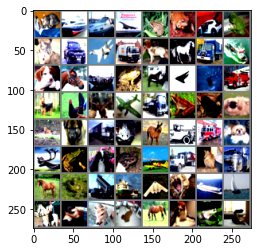

In [ ]:
dataiter = iter(testloader)
images, labels = dataiter.next()
#images, labels = images.to(device), labels.to(device)
# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [ ]:
images=images.to(device)
outputs = model(images)

EVA6_Session7_Model.ipynb:226: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


In [ ]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat  ship  ship plane


In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels= images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

EVA6_Session7_Model.ipynb:226: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Accuracy of the network on the 10000 test images: 81 %


In [29]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels= images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))   

EVA6_Session7_Model.ipynb:226: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Accuracy of plane : 82 %
Accuracy of   car : 82 %
Accuracy of  bird : 67 %
Accuracy of   cat : 68 %
Accuracy of  deer : 87 %
Accuracy of   dog : 77 %
Accuracy of  frog : 92 %
Accuracy of horse : 87 %
Accuracy of  ship : 96 %
Accuracy of truck : 87 %


In [ ]:
if epoch==20:                                      
              for i in range(len(target)):
                if pred[i]!=target[i]:
                  #print('J is:', j)
                  if j in range (10):
                    j = j + 1
                                          
                    #print('Hello')

                    plt.subplot(5, 2, j)
                    plt.axis('off')
                    #plt.title(vNormalizationType)
                    plt.savefig('image'+str(vNormalizationType)+'.png')
                    plt.imshow(data_copy[i].squeeze(0), cmap='gray_r')

                    #plt.savefig()
                    #plt.imshow(data_copy[i].squeeze(0))
                    #plt.show()

In [30]:
#idx = torch.tensor(trainset.targets) == 0
idx = torch.tensor(trainset.targets) == 2
idx += torch.tensor(trainset.targets) == 3
#idx += torch.tensor(trainset.targets) == 4
idx += torch.tensor(trainset.targets) == 5
dset_train = torch.utils.data.dataset.Subset(trainset, np.where(idx==1)[0])

#idx = torch.tensor(CIFAR10_test.targets) == 1
#idx += torch.tensor(CIFAR10_test.targets) == 2
#dset_test = torch.utils.data.dataset.Subset(CIFAR100_test, np.where(idx==1)[0])

In [31]:
dl_train = torch.utils.data.DataLoader(dset_train, batch_size=32, shuffle=True)
#dl_test = torch.utils.data.DataLoader(dset_test, batch_size=8, shuffle=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 138, 274])
 bird  bird  bird  bird


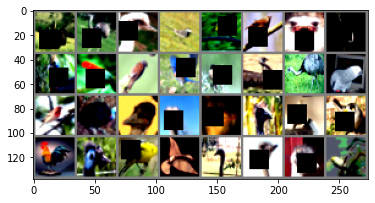

In [ ]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    print(img.size())
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(dl_train)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images['image']))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [32]:
for epoch in range(30):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(dl_train, 0):
        # get the inputs
        inputs, labels = data
        #print(labels)
        inputs, labels = inputs['image'].float().to(device), labels.to(device) 
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
#        running_loss += loss.item()
#        if i % 2000 == 1999:    # print every 2000 mini-batches
#            print('[%d, %5d] loss: %.3f' %
#                  (epoch + 1, i + 1, running_loss / 2000))
#            running_loss = 0.0

print('Finished Training')

EVA6_Session7_Model.ipynb:226: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Finished Training


In [ ]:
len(dl_train)

625

In [41]:
#torch.save(model, '/content/gdrive/My Drive/EVA6_Assignment7_Model.pt')
torch.save(model, '/content/gdrive/My Drive/Colab Notebooks/EVA6_Assignment7_Model.pt')